In [1]:
import torch
from ssd import build_ssd

from data import SWITCHDetection,SWITCHAnnotationTransform
from data import SWITCH_CLASSES as labelmap


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import os
from data import BaseTransform

In [4]:
num_classes = 2+1

In [5]:
net = build_ssd('test', 300, num_classes)   

E:\agent4\ssd.pytorch\ssd.py:34: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.priors = Variable(self.priorbox.forward(), volatile=True)
E:\agent4\ssd.pytorch\layers\modules\l2norm.py:17: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(self.weight,self.gamma)


In [6]:
net.cuda();

In [7]:
net.load_state_dict(torch.load('weights/ssd300_COCO_7000.pth'))

In [8]:
net.eval();

In [9]:
voc_root = r'E:\agent3\lab\switch'

annopath = os.path.join(voc_root, 'Annotations', '%s.xml')
imgpath = os.path.join(voc_root, 'JPEGImages', '%s.jpg')
imgsetpath = os.path.join(voc_root, 'ImageSets',
                          'Main') + '/' + '{:s}.txt'
devkit_path = voc_root


dataset_mean = (104, 117, 123)
#set_type = 'test'
set_type = 'trainval'


In [10]:
dataset = SWITCHDetection(voc_root,  set_type+'.txt',#'test.txt',
                          BaseTransform(300, dataset_mean),
                          SWITCHAnnotationTransform(),
                          )


In [11]:
for a,b in dataset:
    break

In [12]:
ag = a.clone().detach().unsqueeze_(0).requires_grad_(True)

In [13]:
xs = []

In [14]:
x = ag.cuda()
for k in range(23):
    x = net.vgg[k](x)
    xs.append(x)

In [15]:
xs[-1].shape

torch.Size([1, 512, 38, 38])

In [16]:
xs[-1].sum(0).sum(0)[19,19].backward()

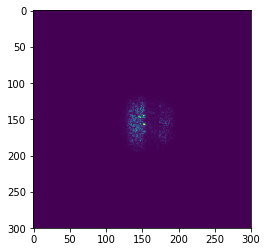

In [17]:
plt.imshow(torch.abs(ag.grad).sum(0).sum(0))

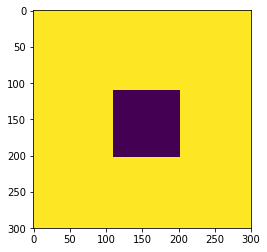

In [18]:
plt.imshow(torch.abs(ag.grad).sum(0).sum(0)==0)

In [19]:
net.vgg

ModuleList(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1

In [20]:
ag = a.clone().detach().unsqueeze_(0).requires_grad_(True)

In [21]:
xs = []
x = ag.cuda()
for k in range(23):
    x = net.vgg[k](x)
    xs.append(x)

In [22]:
xs[-8].shape

torch.Size([1, 256, 75, 75])

In [23]:
xs[-8].sum(0).sum(0)[37,37].backward()

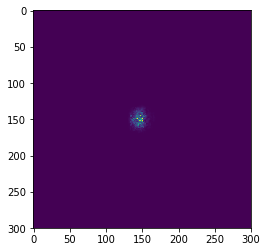

In [24]:
plt.imshow(torch.abs(ag.grad).sum(0).sum(0))

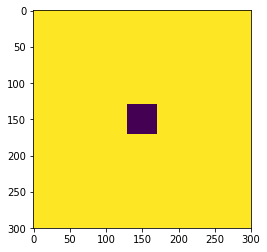

In [25]:
plt.imshow(torch.abs(ag.grad).sum(0).sum(0)==0)

In [26]:
ag = a.clone().detach().unsqueeze_(0).requires_grad_(True)

In [27]:
xs = []
x = ag.cuda()
for k in range(len(net.vgg)):
    x = net.vgg[k](x)
    xs.append(x)

In [28]:
xs[-1].shape

torch.Size([1, 1024, 19, 19])

In [29]:
xs[-8].sum(0).sum(0)[9,9].backward()

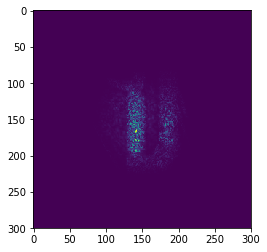

In [30]:
plt.imshow(torch.abs(ag.grad).sum(0).sum(0))

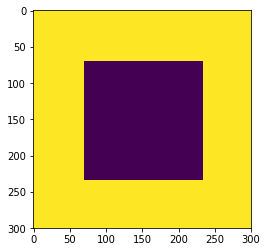

In [31]:
plt.imshow(torch.abs(ag.grad).sum(0).sum(0)==0)

In [32]:
len(net.vgg)

35

(array([14848.,  2738.,  4208.,  1798.,  2242.,  1924.,  1508.,  1920.,
         1748.,  1994.]),
 array([0.01333333, 0.112     , 0.21066667, 0.30933333, 0.408     ,
        0.50666667, 0.60533333, 0.704     , 0.80266667, 0.90133333,
        1.        ]),
 <a list of 10 Patch objects>)

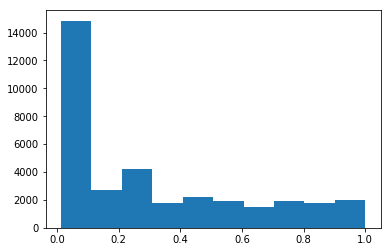

In [33]:
plt.hist(net.priors.flatten())

In [ ]:
f = 38
step = 8
f_k = 300 / step
min_size = 30
image_size = 300

In [34]:
net.priors.shape

torch.Size([8732, 4])

In [35]:
ag = a.clone().detach().unsqueeze_(0).requires_grad_(True)

xs = []

x = ag.cuda()
for k in range(23):
    x = net.vgg[k](x)
    xs.append(x)
    
xs[-1].shape

torch.Size([1, 512, 38, 38])

In [59]:
xs[-1].sum(0).sum(0)[19,19].backward()

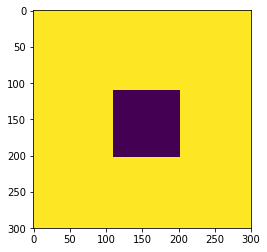

In [60]:
plt.imshow(torch.abs(ag.grad).sum(0).sum(0)==0)

In [77]:
d = torch.abs(ag.grad[0]).sum(0)
d.shape

torch.Size([300, 300])

In [88]:
dx = d.sum(0).nonzero().squeeze()
dy = d.sum(1).nonzero().squeeze()

In [89]:
dx.min(),dy.min(),dx.max(),dy.max()

(tensor(110), tensor(110), tensor(201), tensor(201))

In [96]:
dd = []
for i in range(f):
    ag = a.clone().detach().unsqueeze_(0).requires_grad_(True)

    xs = []

    x = ag.cuda()
    for k in range(23):
        x = net.vgg[k](x)
        xs.append(x)
        
    xs[-1].sum(0).sum(0)[i,i].backward()
    
    d = torch.abs(ag.grad[0]).sum(0)
    dx = d.sum(0).nonzero().squeeze()
    dy = d.sum(1).nonzero().squeeze()
    
    dd.append([dx.min(),dy.min(),dx.max(),dy.max()])

In [97]:
dd[0]

[tensor(0), tensor(0), tensor(49), tensor(49)]

In [98]:
dd[-1]

[tensor(254), tensor(254), tensor(299), tensor(299)]

In [37]:
net.priors.shape

torch.Size([8732, 4])

In [38]:
from itertools import product


In [93]:
mean = []
for i in range(f):
    row = []
    for j in range(f):
    
        cx = (j + 0.5) / f_k
        cy = (i + 0.5) / f_k

        s_k = min_size/image_size
        row.append([cx, cy, s_k, s_k])
    mean.append(row)

In [95]:
mean[0][0]

[0.013333333333333334, 0.013333333333333334, 0.1, 0.1]

In [119]:
mean = torch.tensor(mean)

In [120]:
ddd = torch.empty_like(mean)
ddd[:,:,0] = (mean[:,:,0] - mean[:,:,2]/2) * 300 
ddd[:,:,1] = (mean[:,:,1] - mean[:,:,3]/2) * 300 
ddd[:,:,2] = (mean[:,:,0] + mean[:,:,2]/2) * 300 
ddd[:,:,3] = (mean[:,:,1] + mean[:,:,3]/2) * 300 

In [49]:
import matplotlib.patches as patches


In [118]:
def rectangle(ax, xy, width, height, edgecolor='r'):
    rect = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=edgecolor, facecolor='none')
    ax.add_patch(rect)

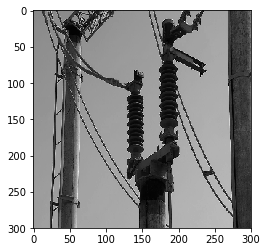

In [91]:
plt.imshow(a.sum(0),cmap='gray')
#rectangle(plt.gca(), )

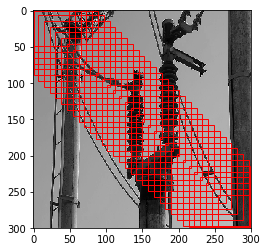

In [113]:
plt.imshow(a.sum(0),cmap='gray')
for i in range(0,f):
    rectangle(plt.gca(), [dd[i][0],dd[i][1]], dd[i][2]-dd[i][0], dd[i][3]-dd[i][1])
    

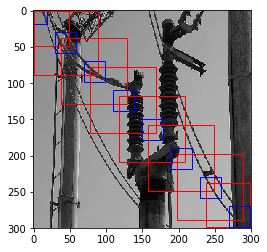

In [125]:
plt.imshow(a.sum(0),cmap='gray')
for i in range(0,f,5):
    rectangle(plt.gca(), [dd[i][0],dd[i][1]], dd[i][2]-dd[i][0], dd[i][3]-dd[i][1])
    rectangle(plt.gca(), [ddd[i,i][0],ddd[i,i][1]], ddd[i,i][2]-ddd[i,i][0], ddd[i,i][3]-ddd[i,i][1], edgecolor='b')